In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
print(f"Dataset Dimensions : {df.shape}")

Dataset Dimensions : (7043, 21)


In [5]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

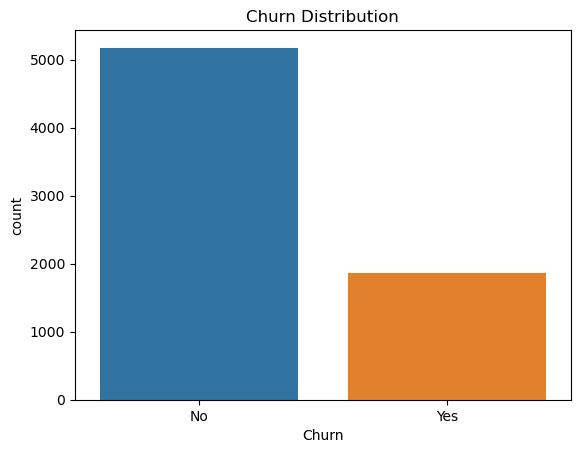

In [10]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

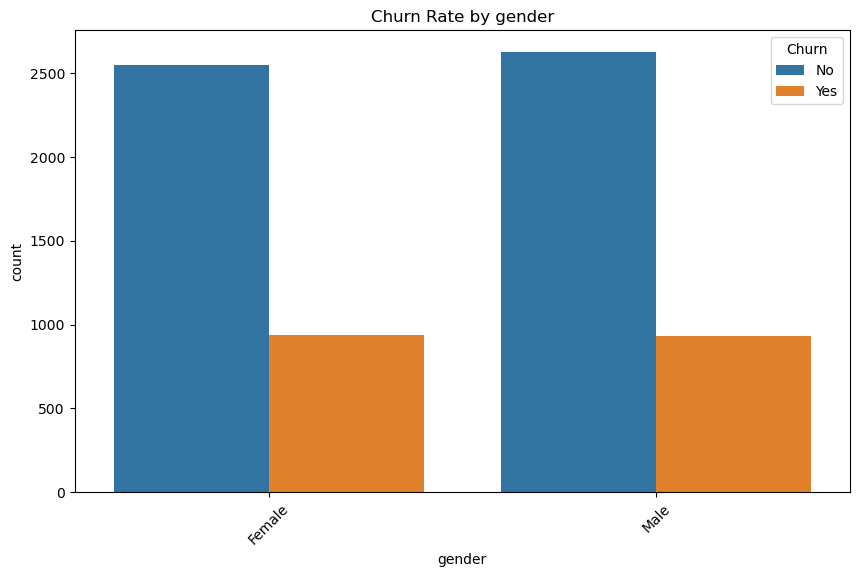

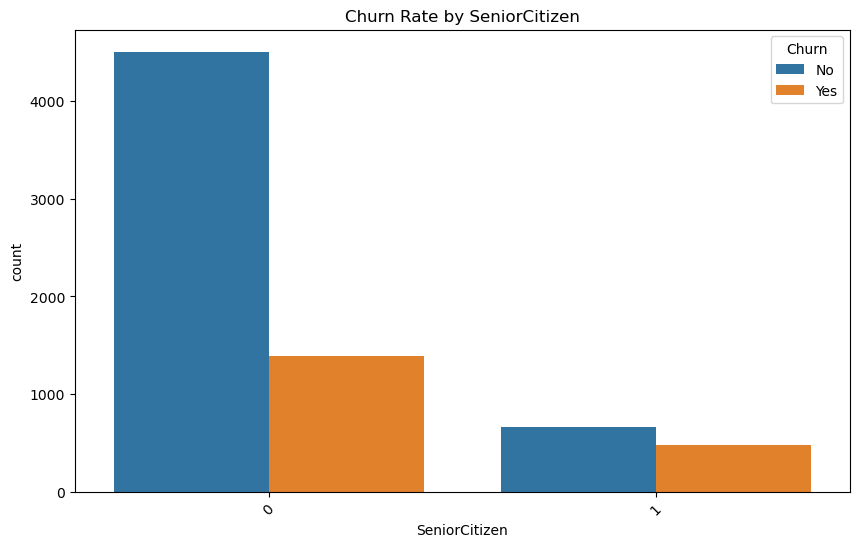

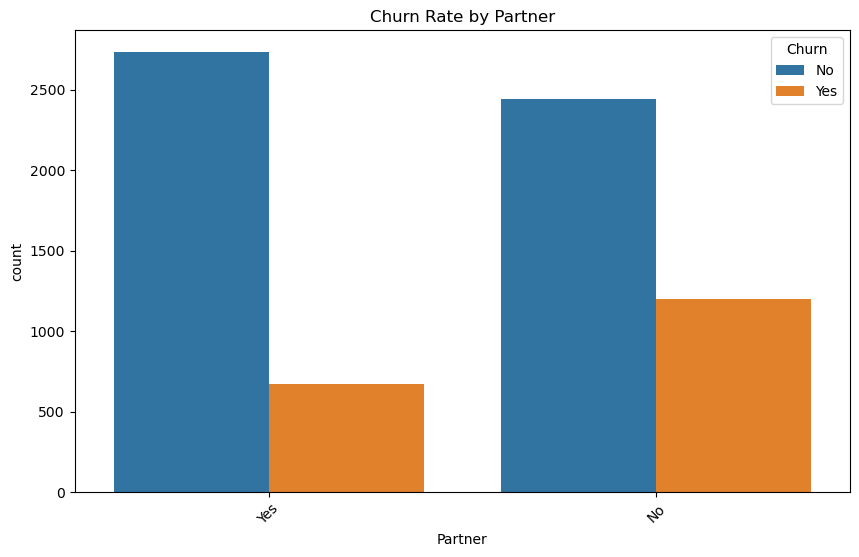

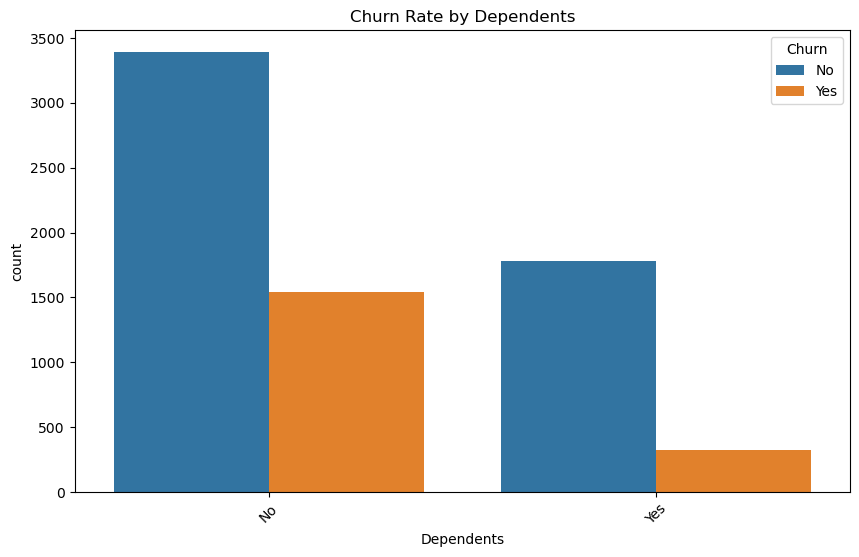

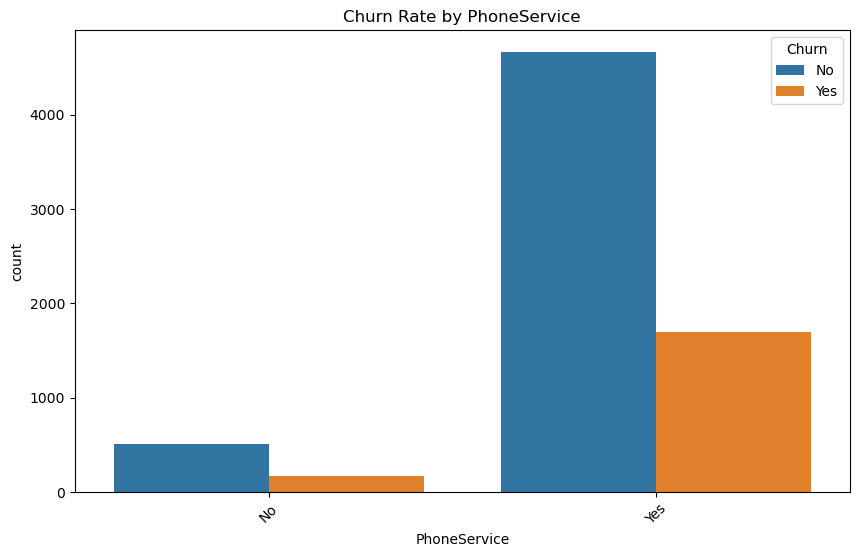

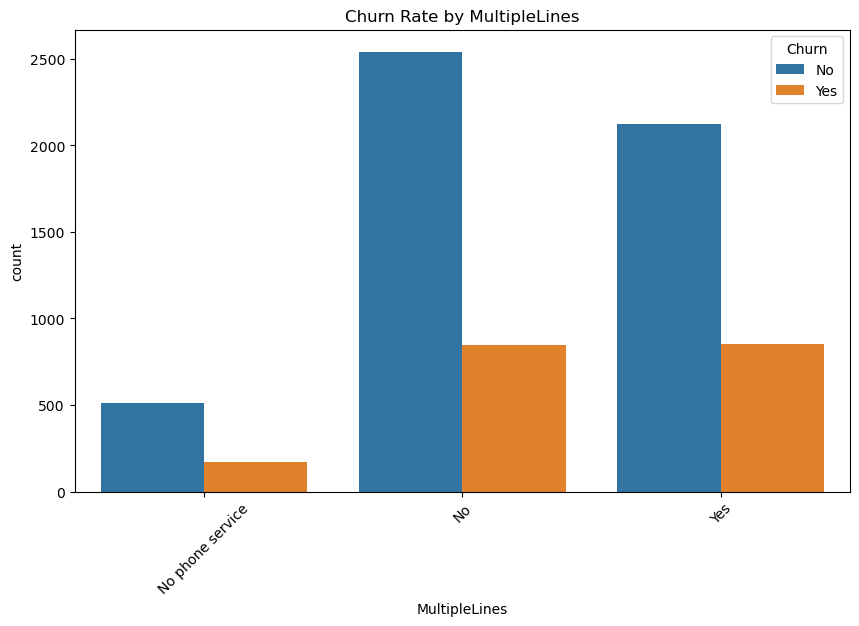

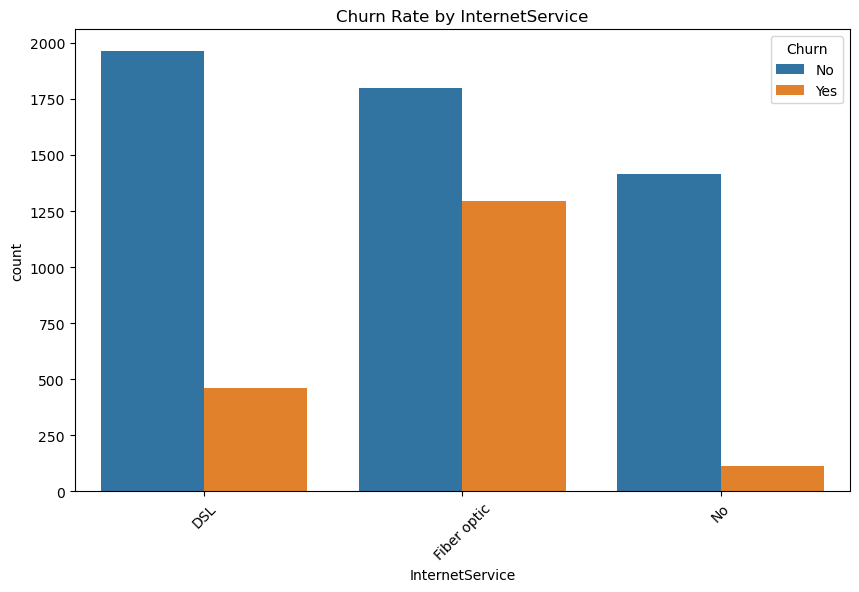

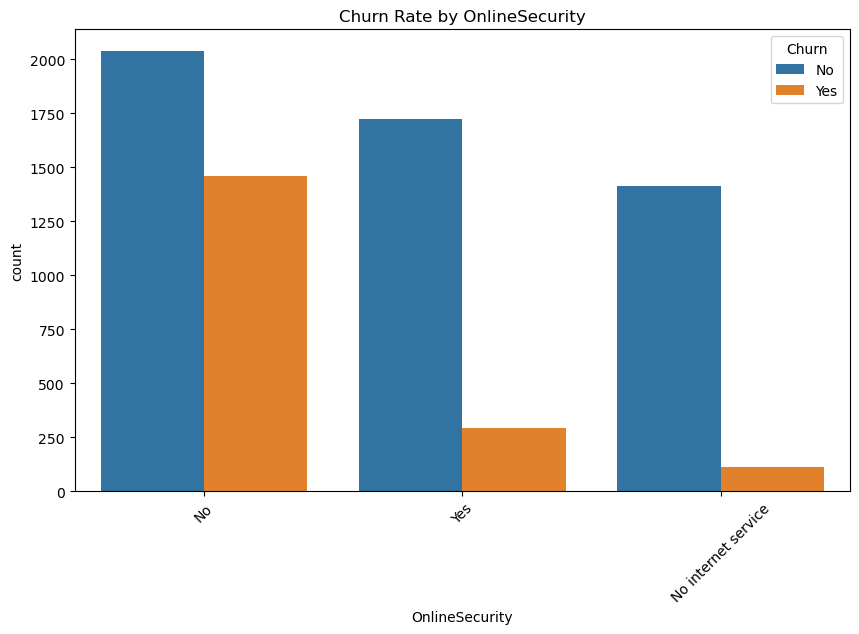

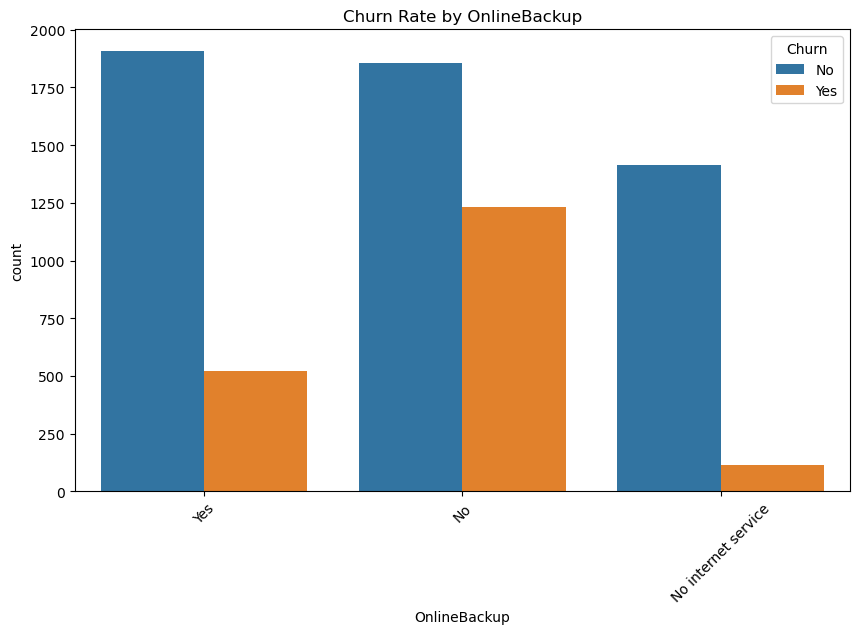

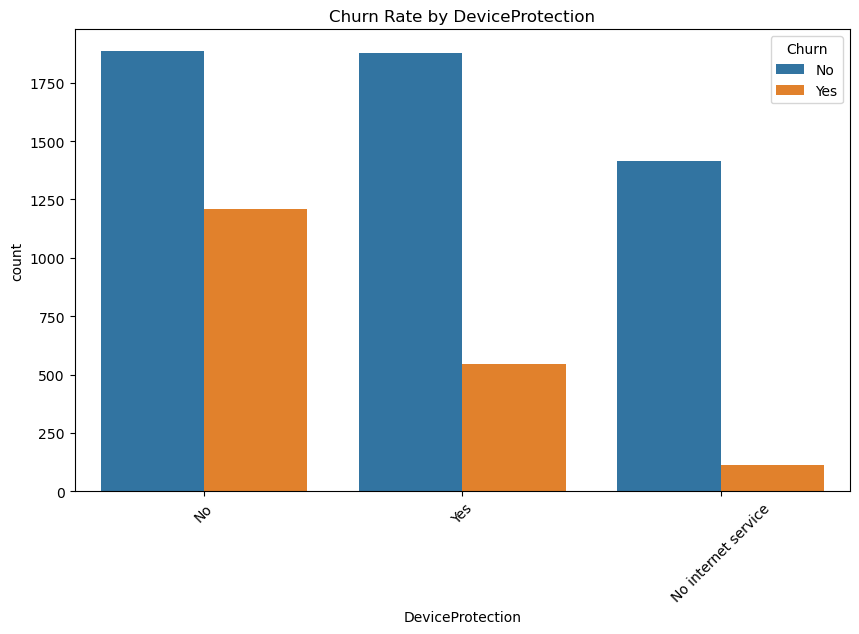

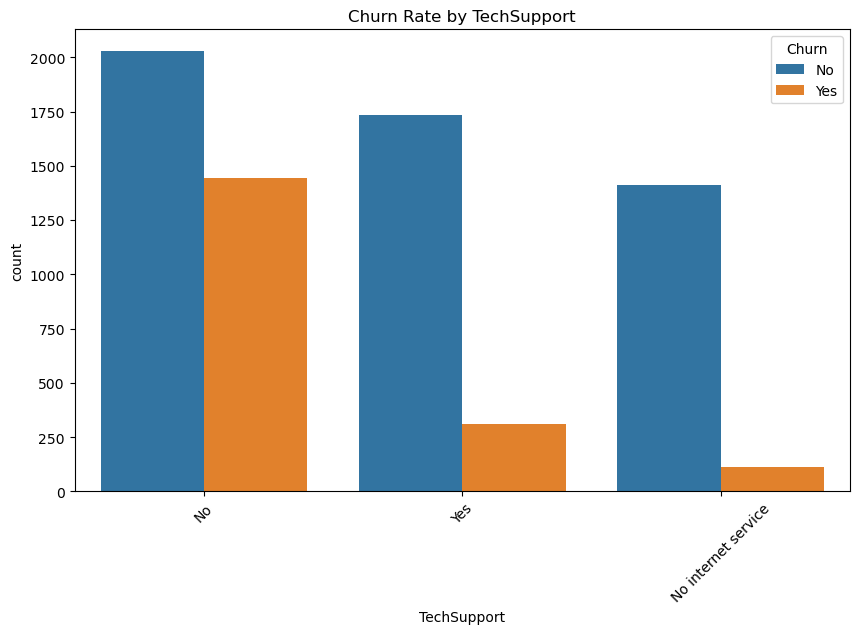

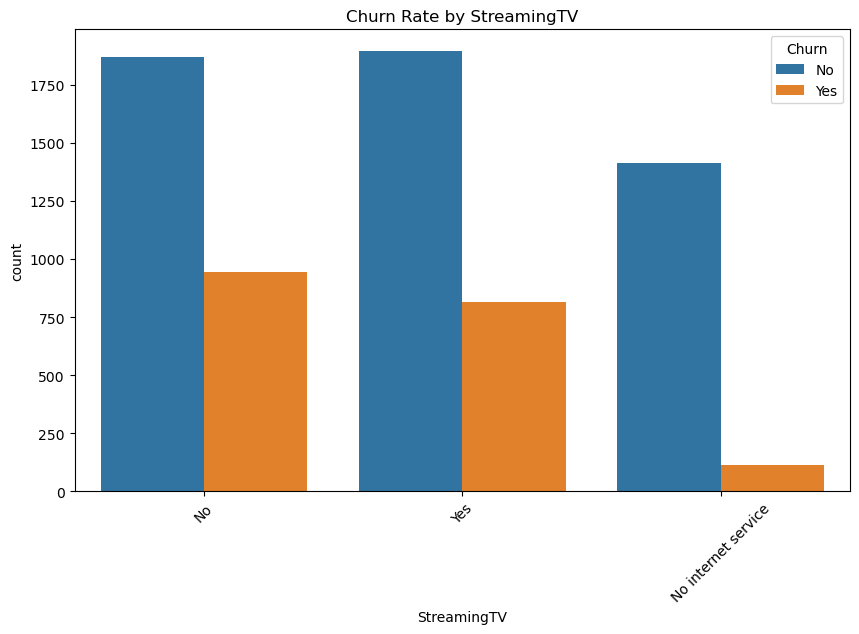

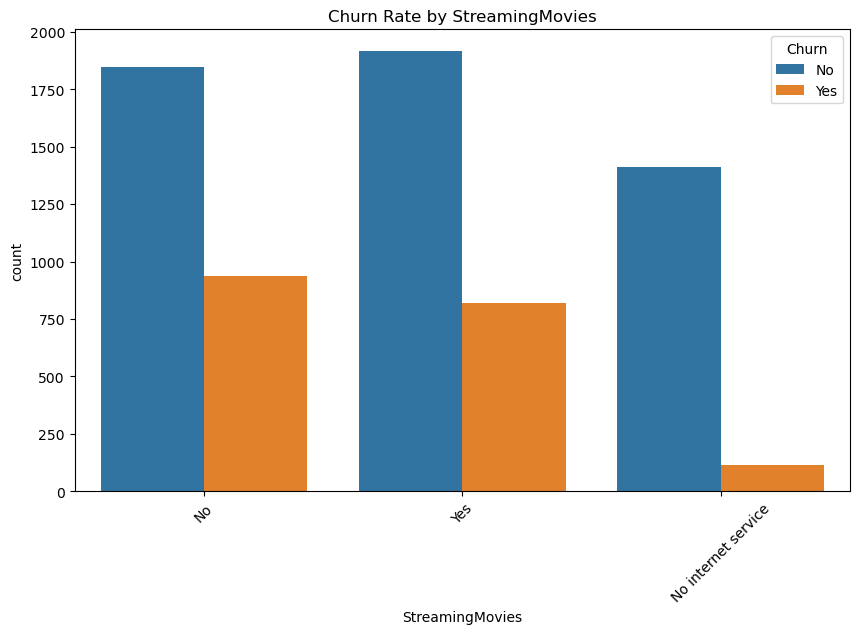

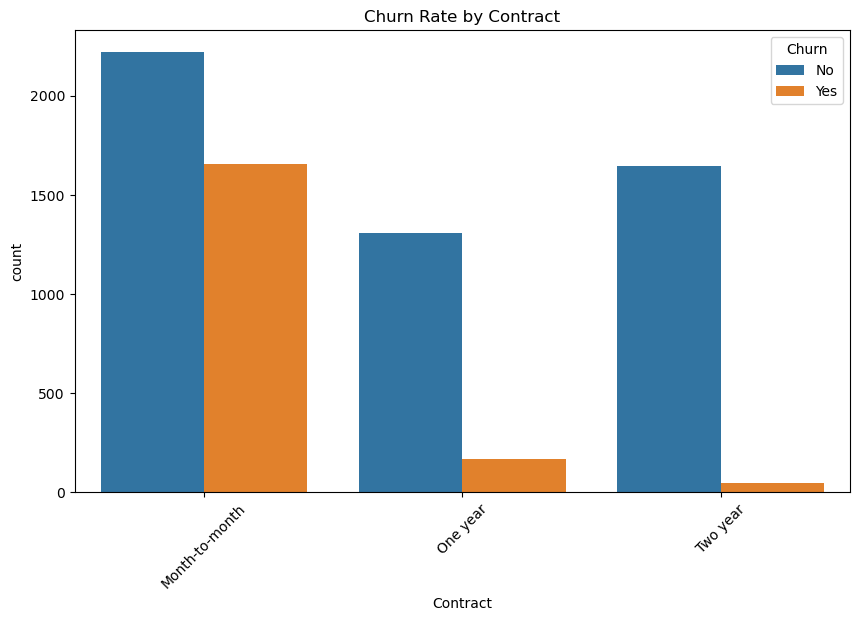

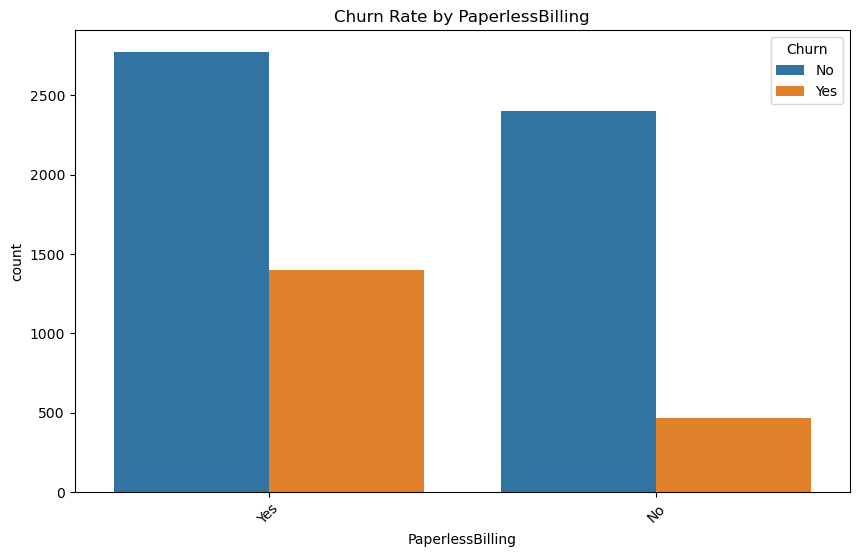

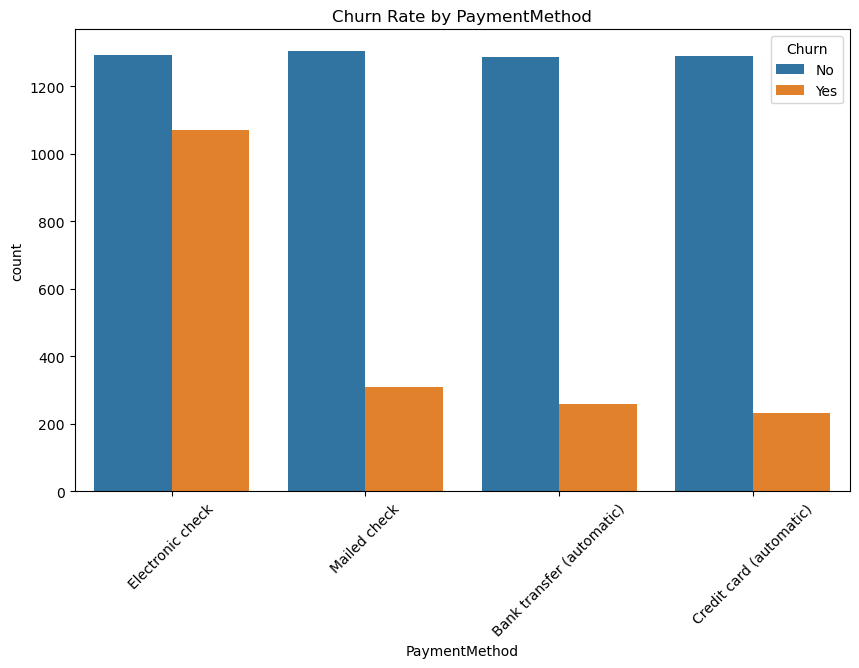

In [11]:
# Visualize the churn rate based on various categorical features
for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xticks(rotation=45)
    plt.show()

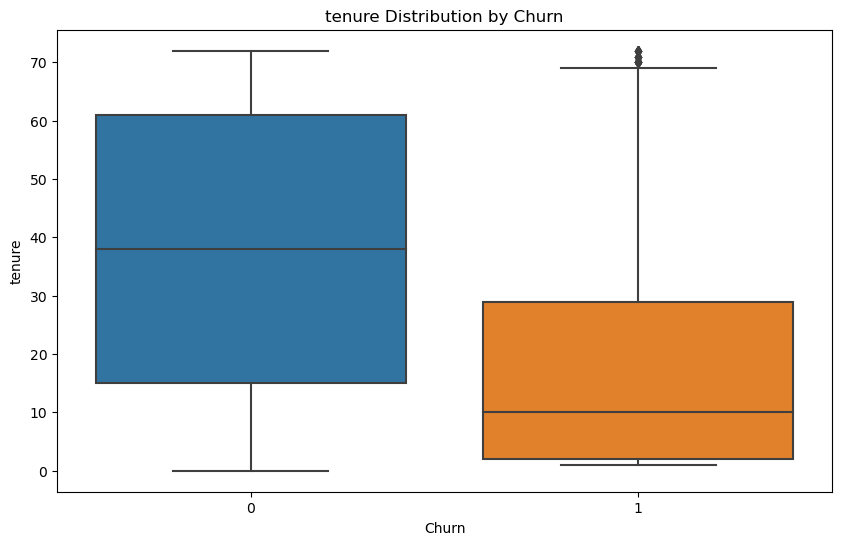

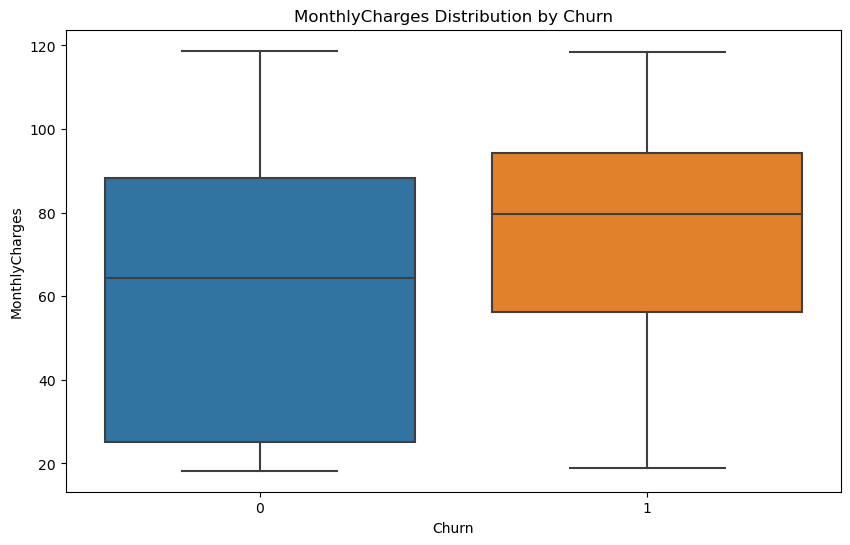

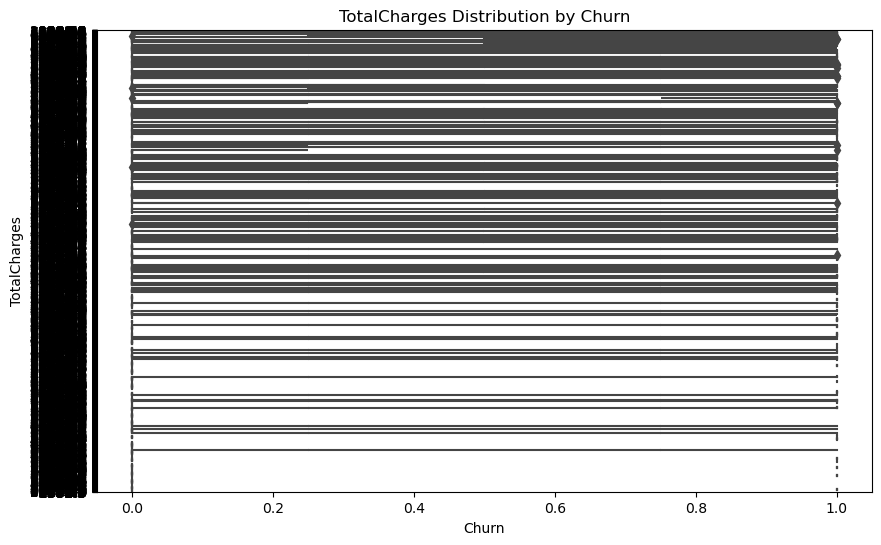

In [12]:
# Convert 'Churn' column to numeric format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Visualize the churn rate based on numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

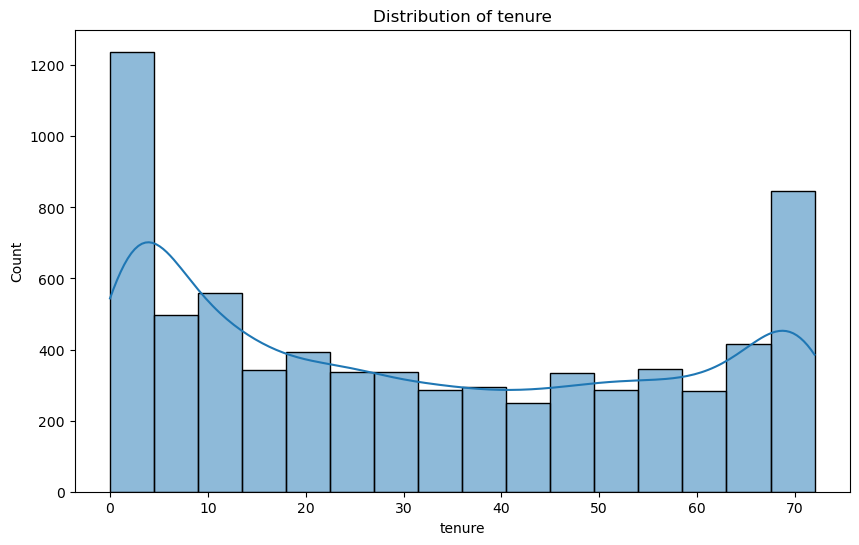

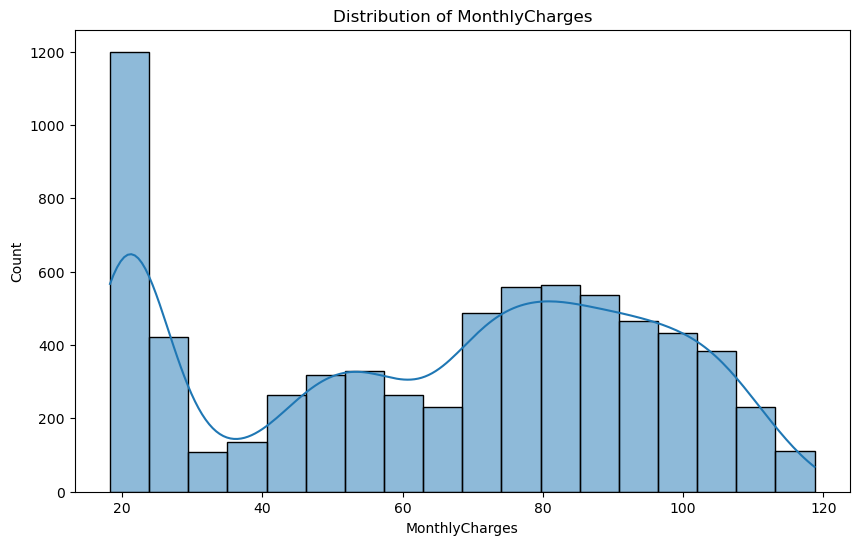

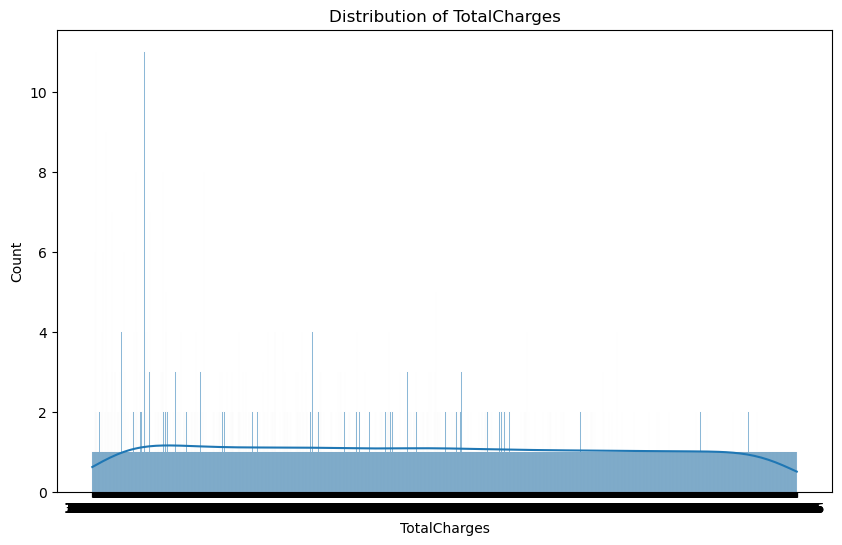

In [13]:
# Visualize the distribution of numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

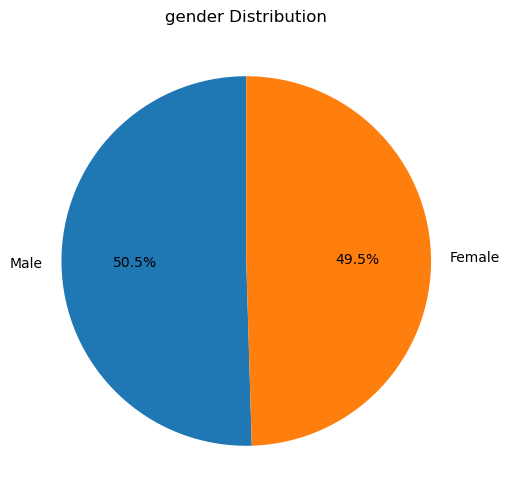

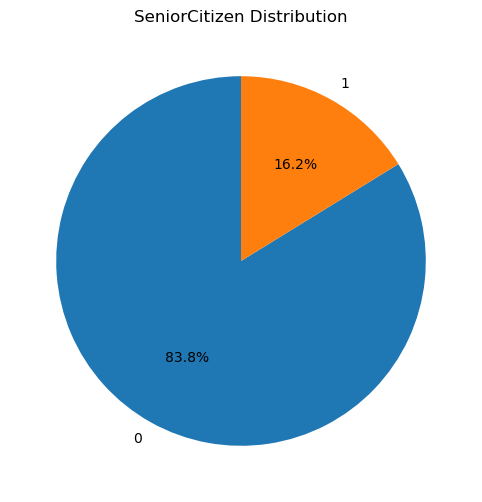

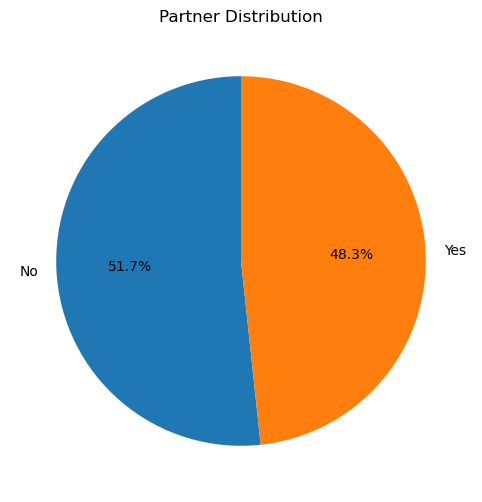

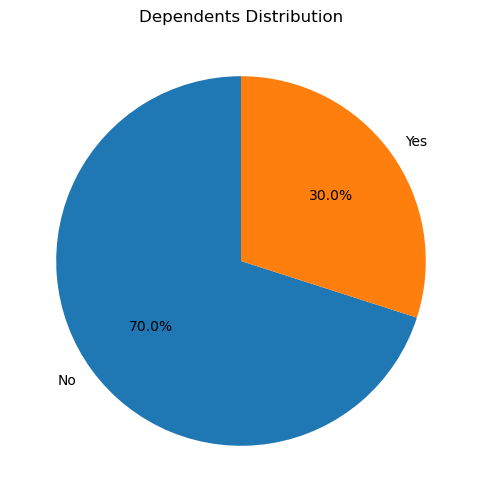

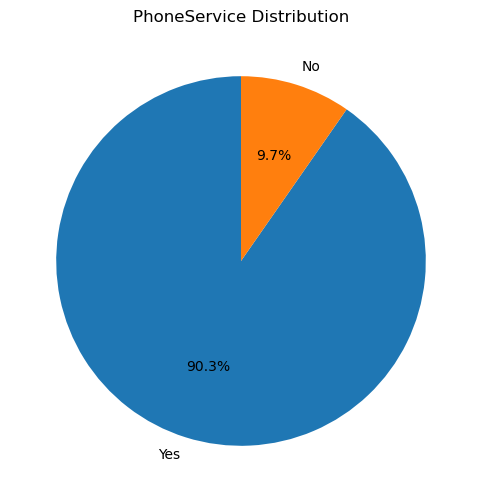

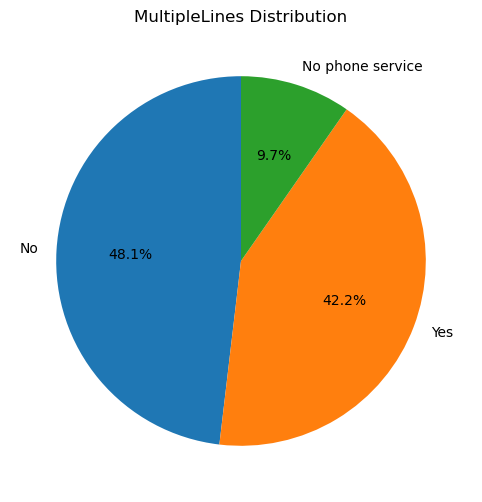

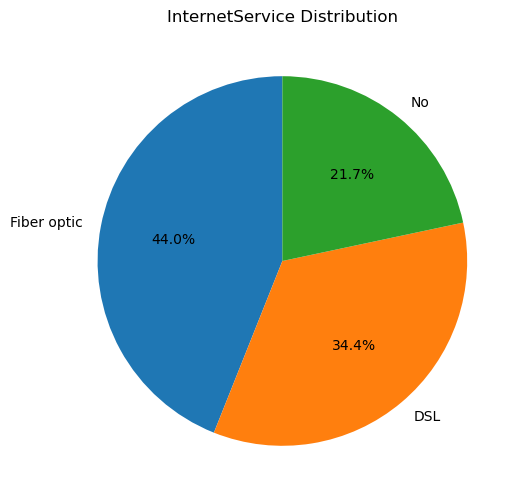

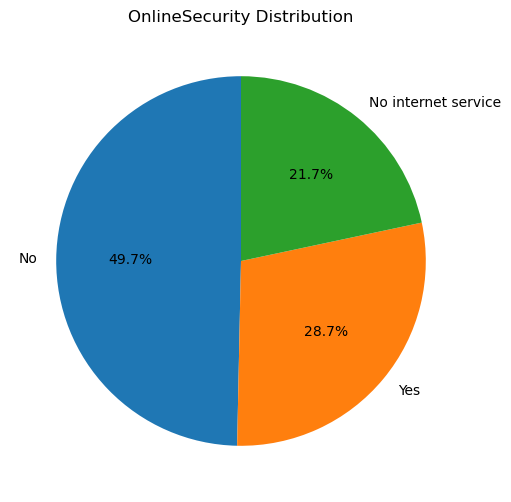

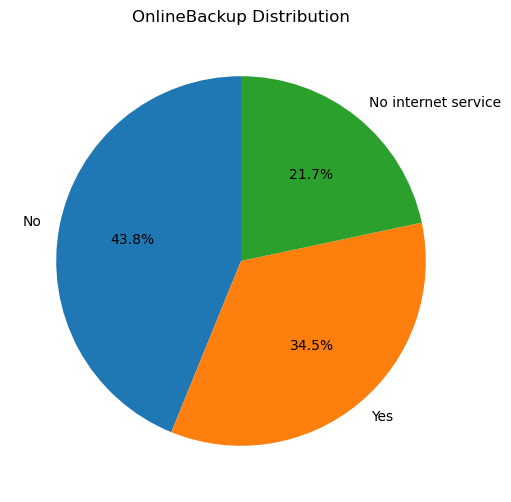

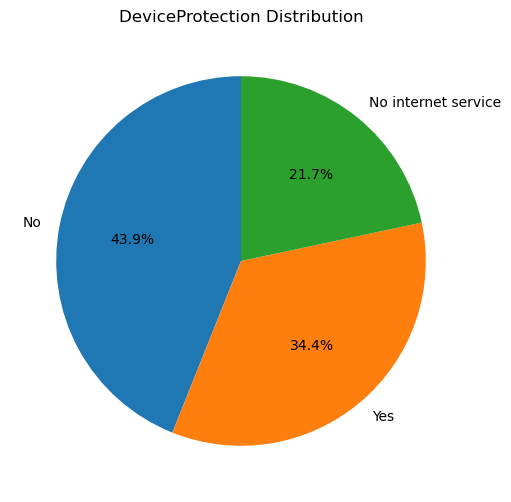

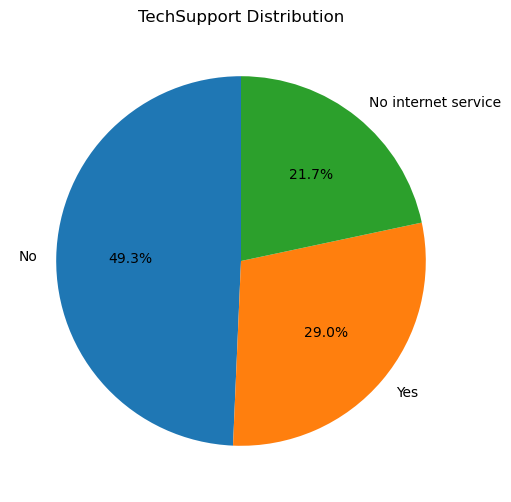

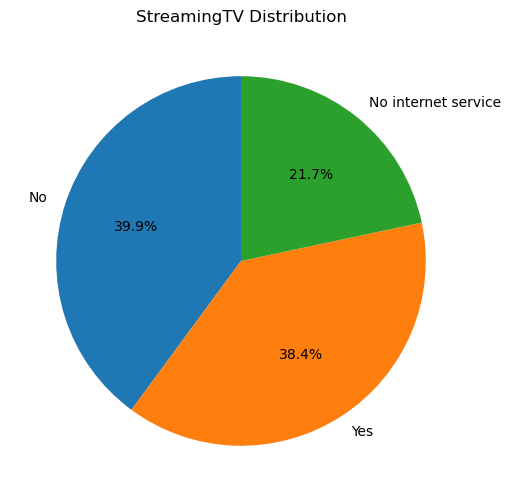

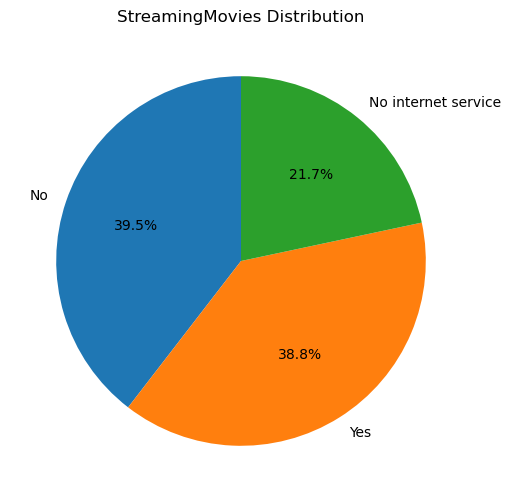

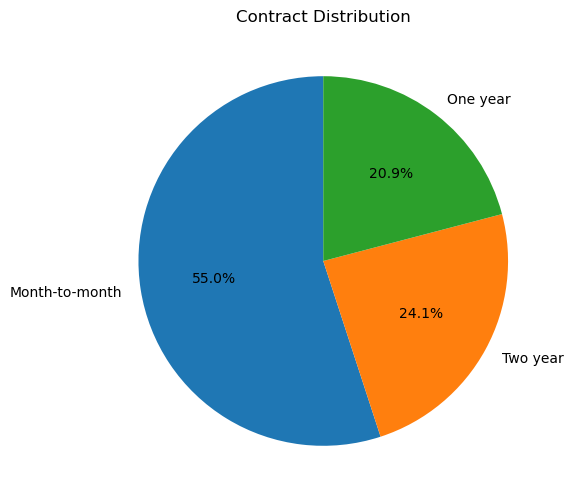

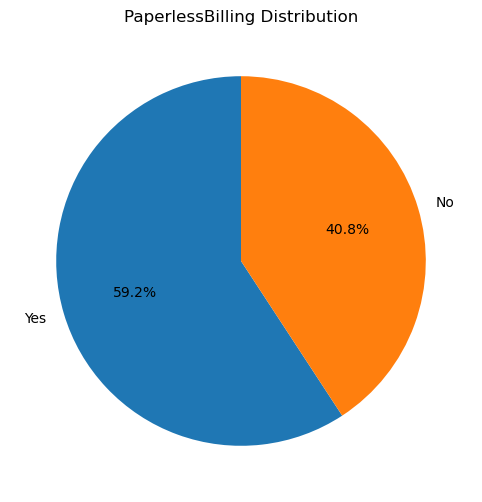

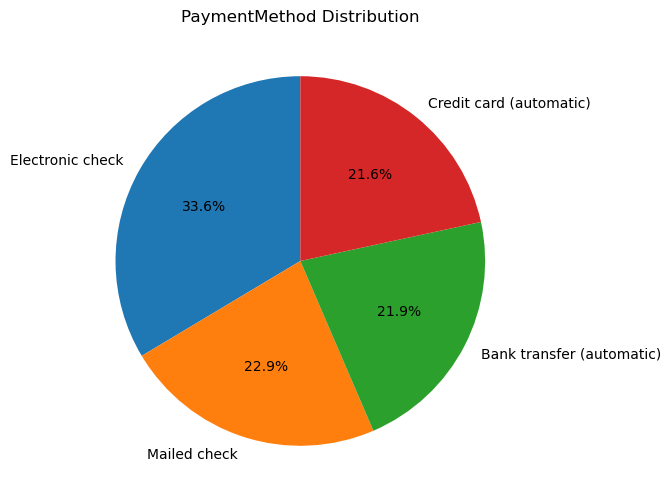

In [14]:
# Visualize the distribution of categorical columns using pie charts
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'{feature} Distribution')
    plt.ylabel('')
    plt.show()

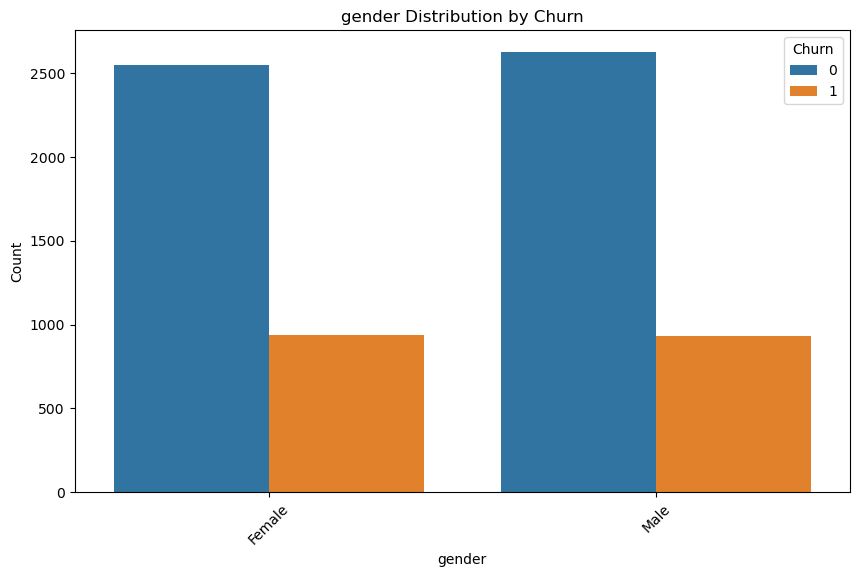

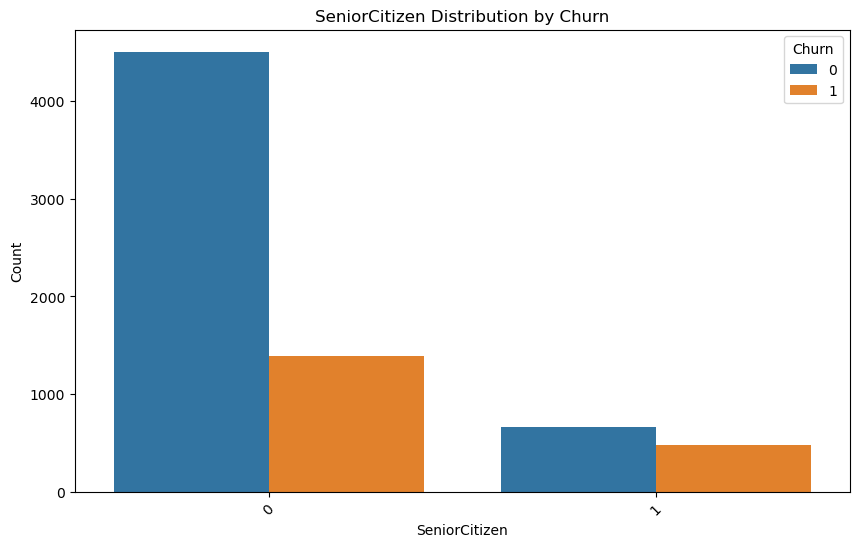

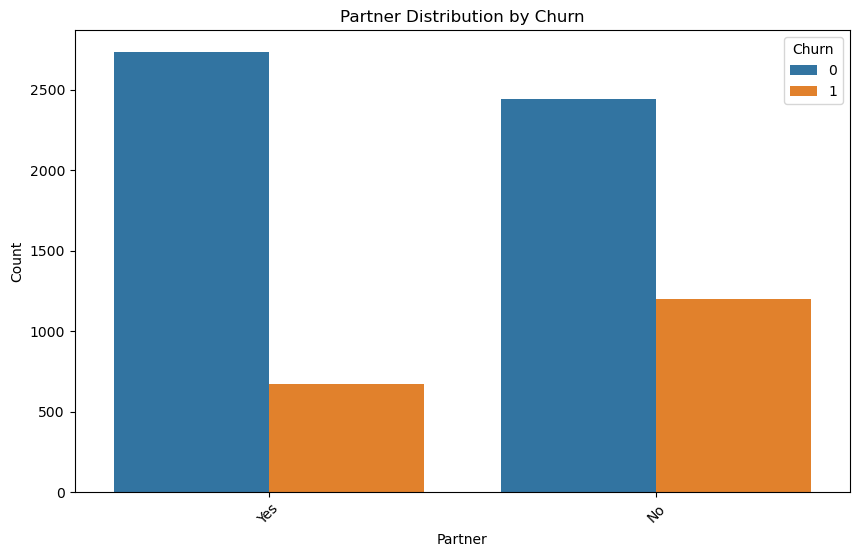

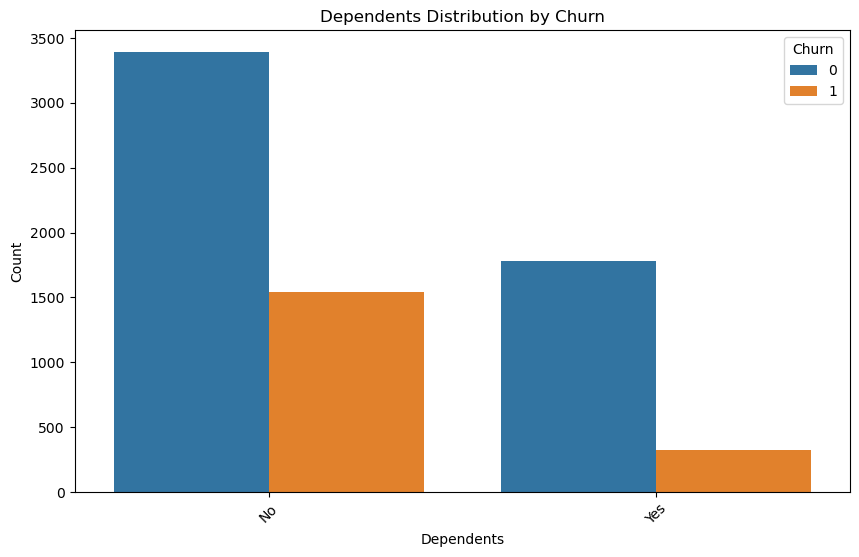

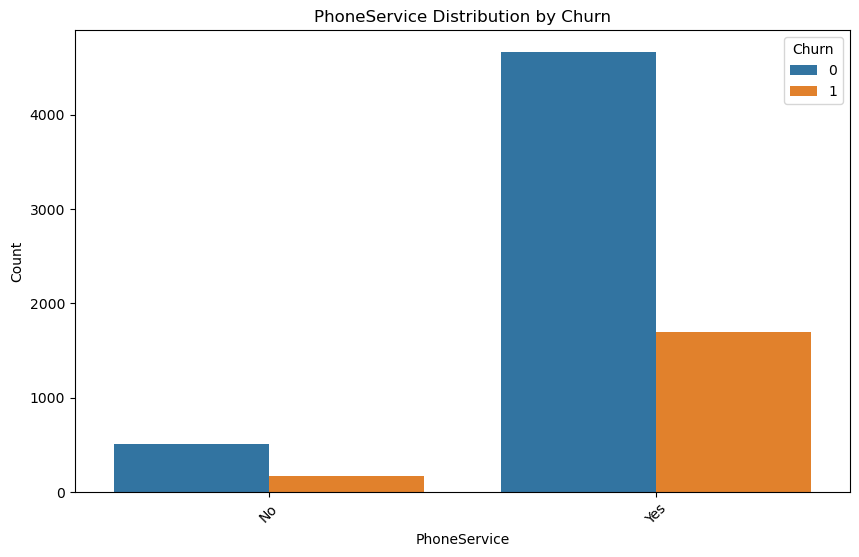

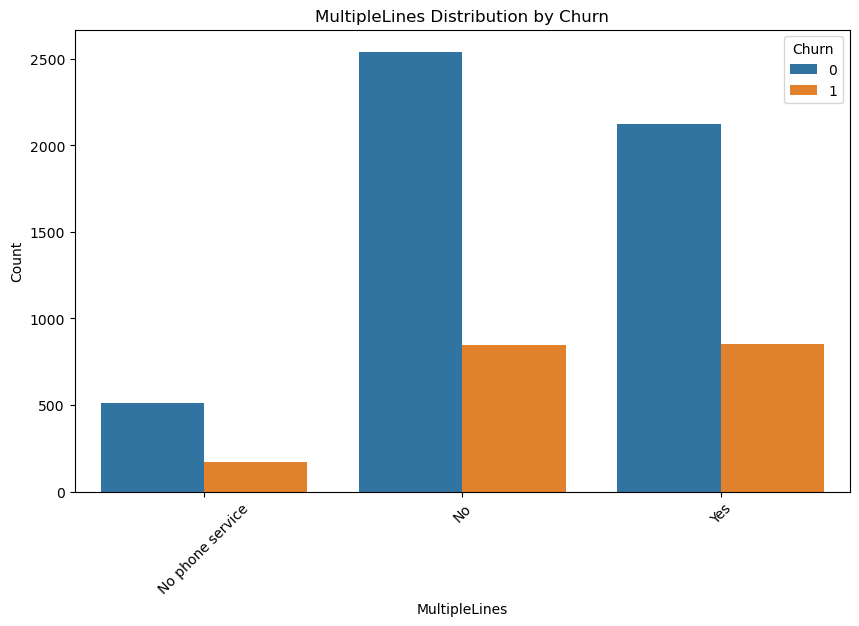

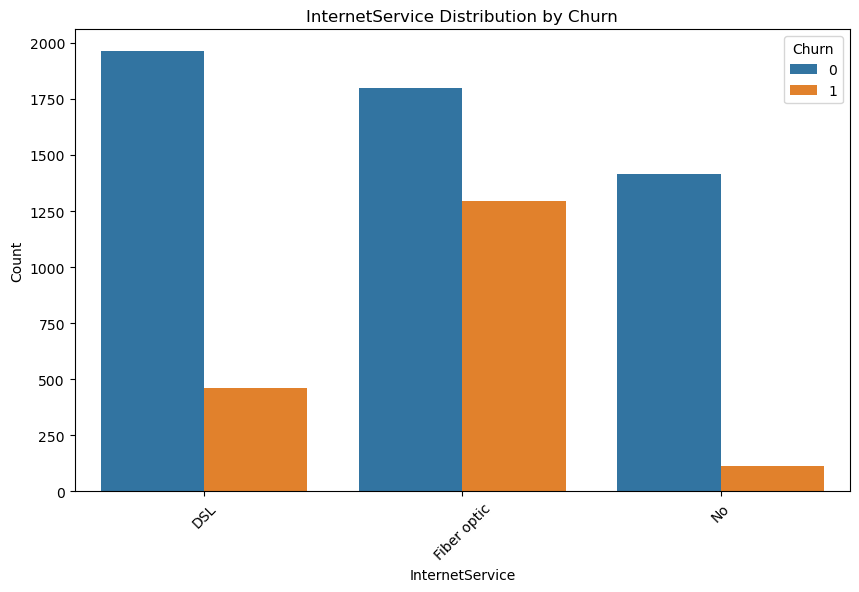

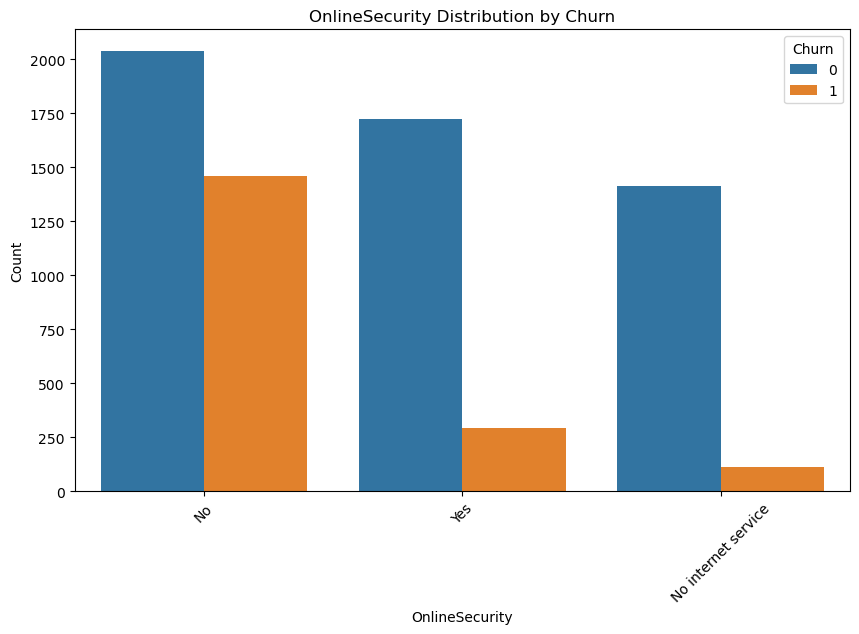

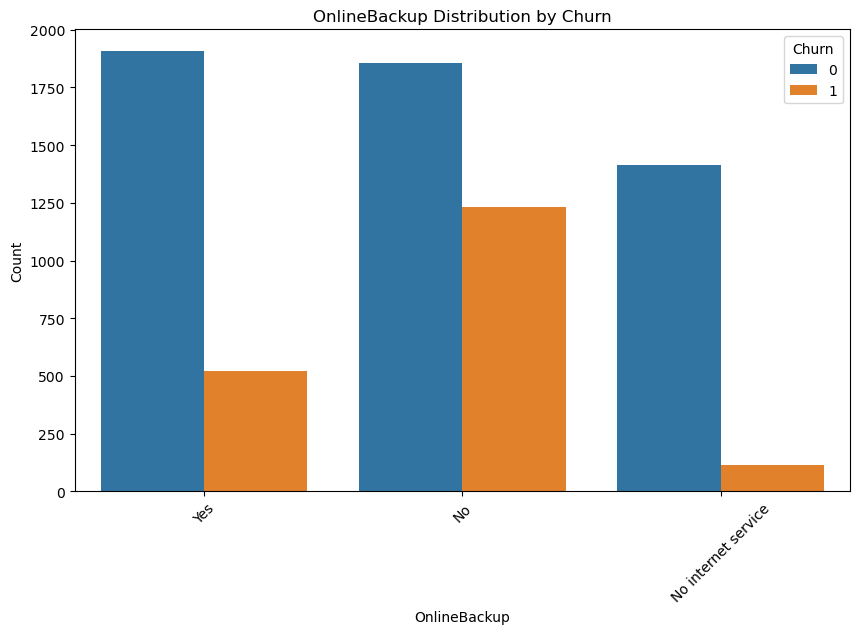

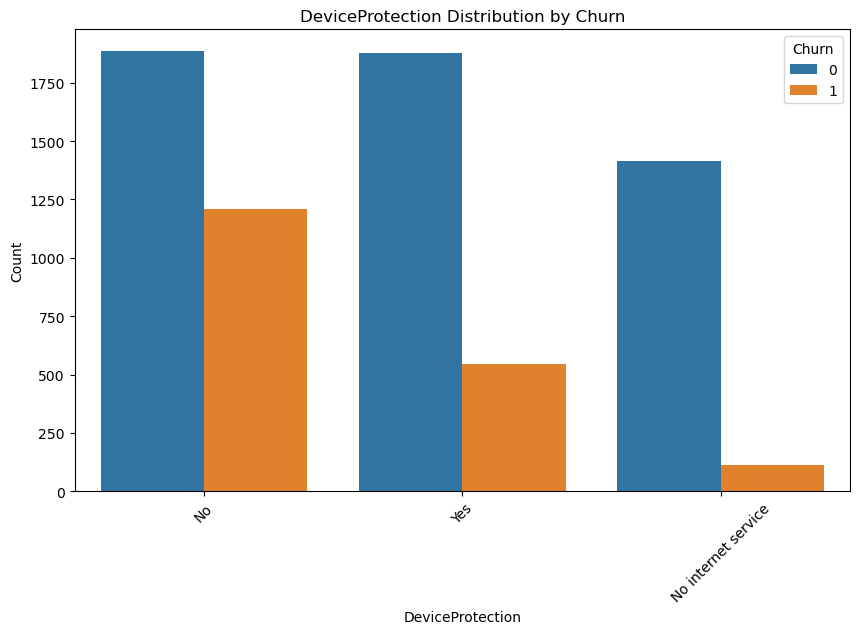

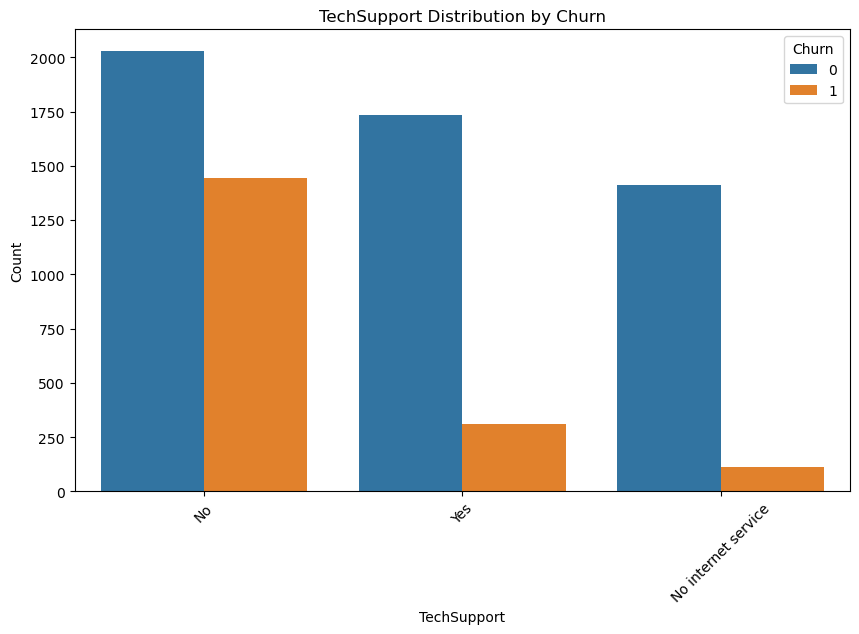

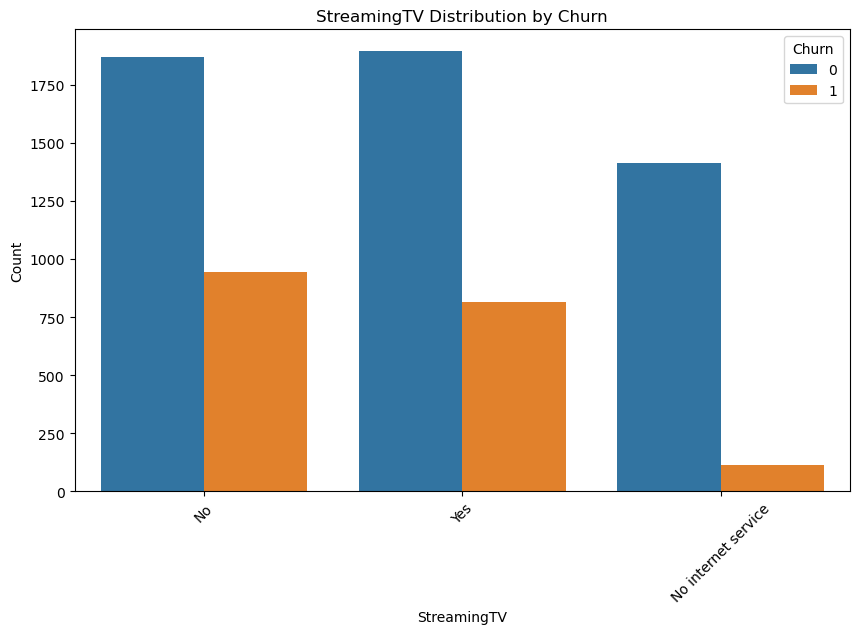

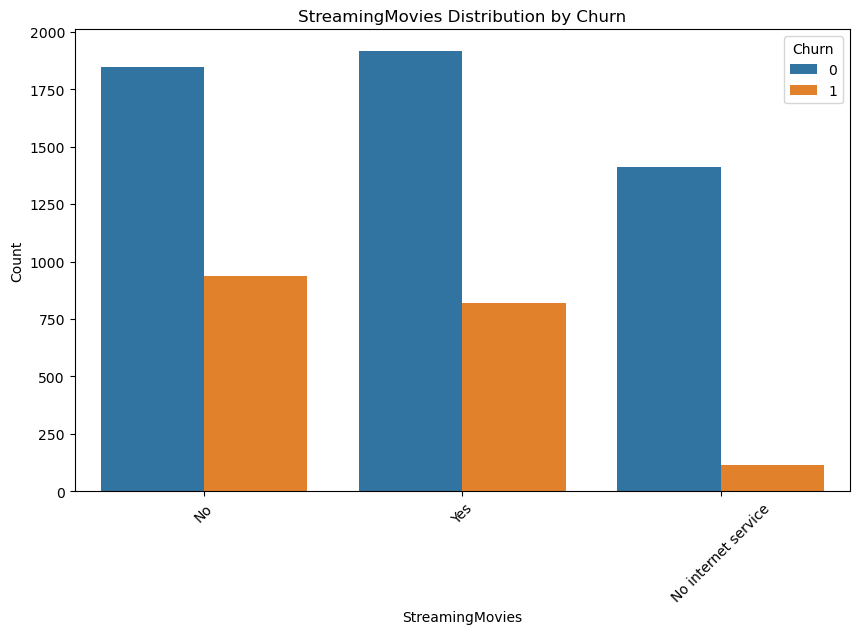

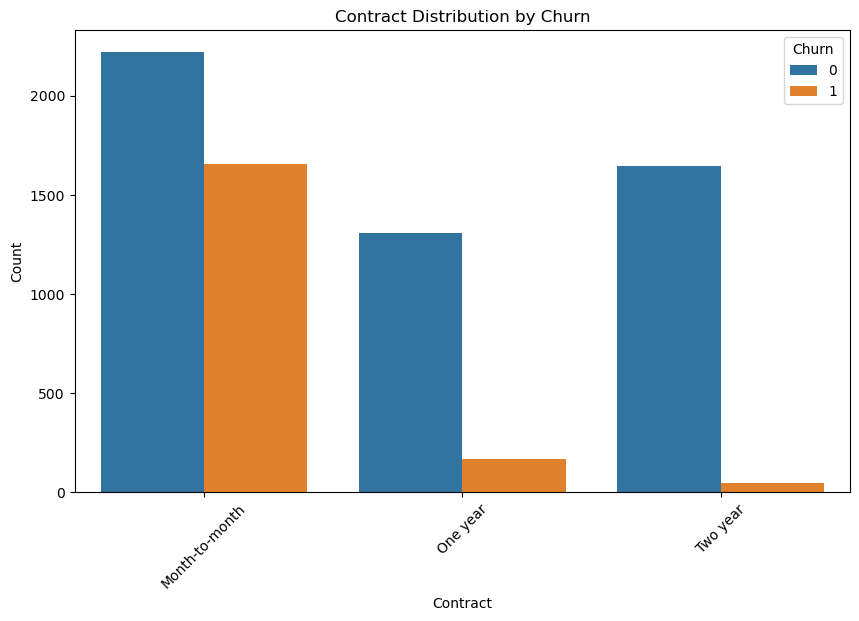

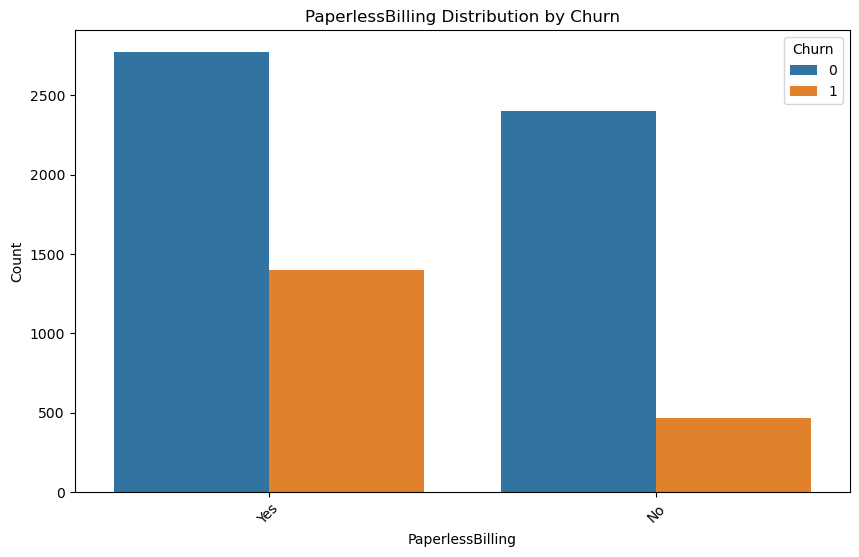

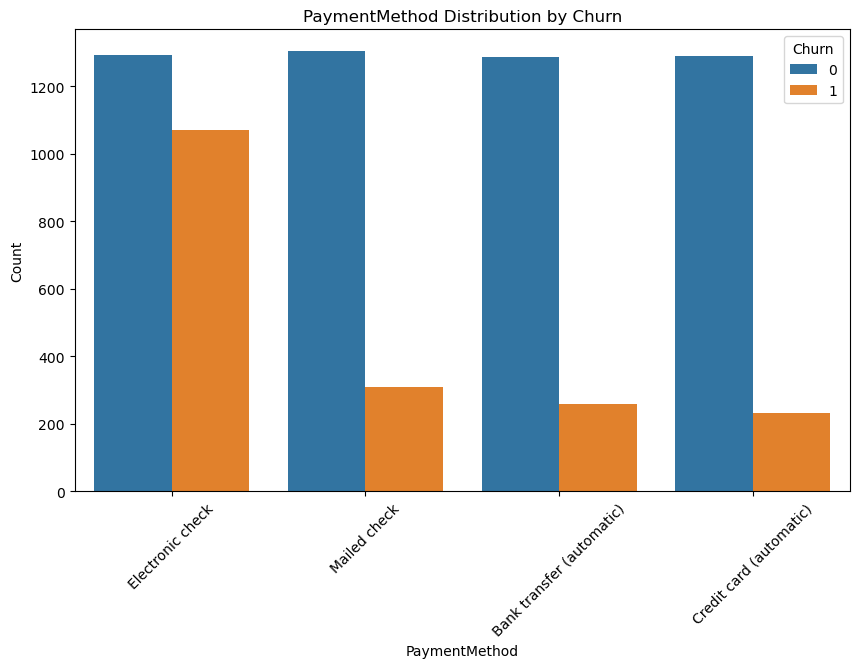

In [15]:
# Visualize the distribution of categorical columns using bar plots
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, hue='Churn')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

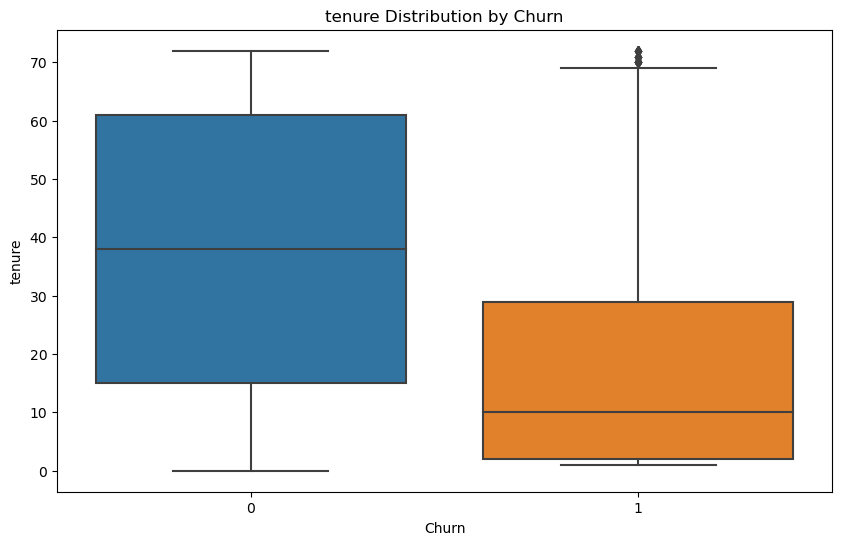

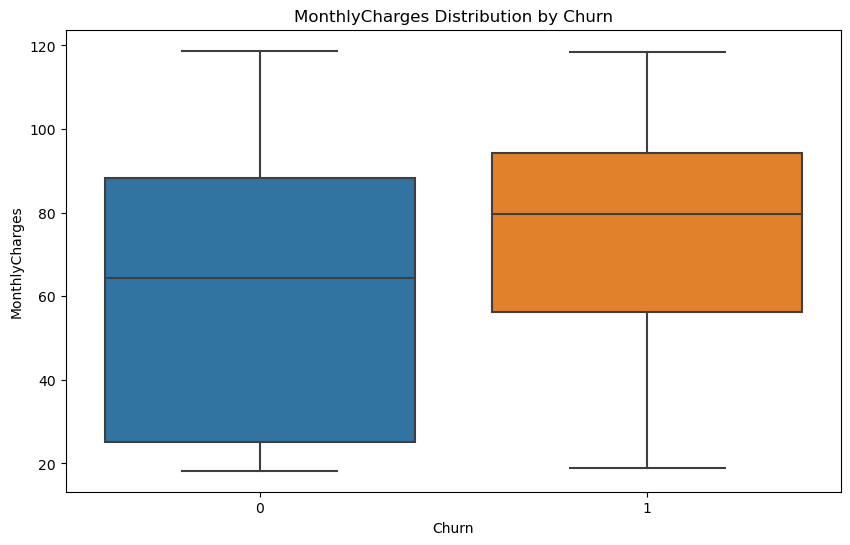

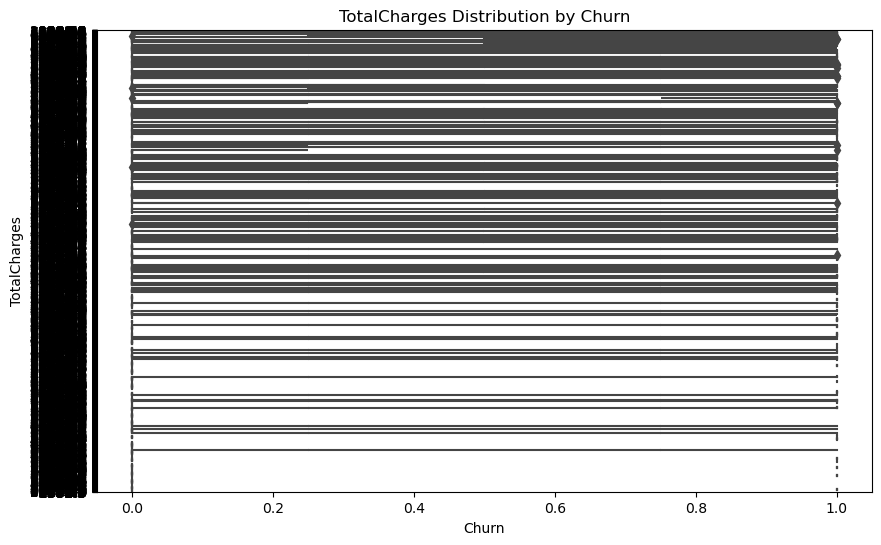

In [16]:
# Visualize the churn distribution based on numerical features using box plots
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

<Figure size 1000x600 with 0 Axes>

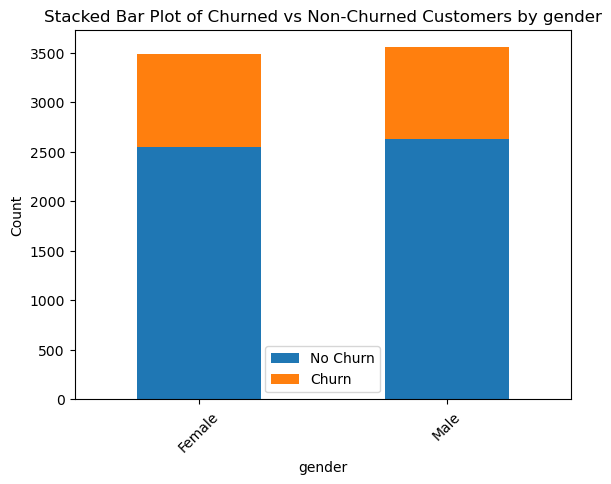

<Figure size 1000x600 with 0 Axes>

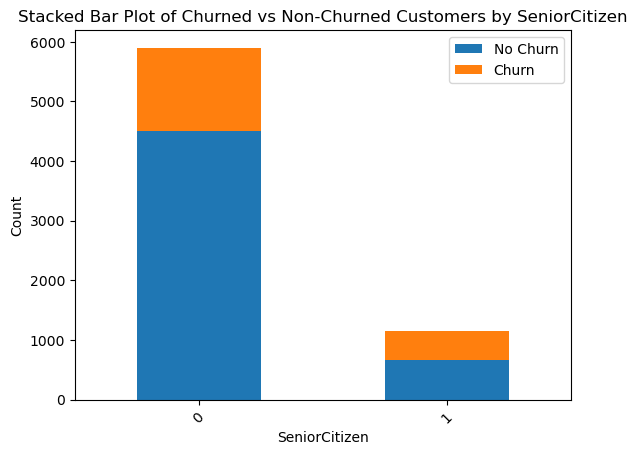

<Figure size 1000x600 with 0 Axes>

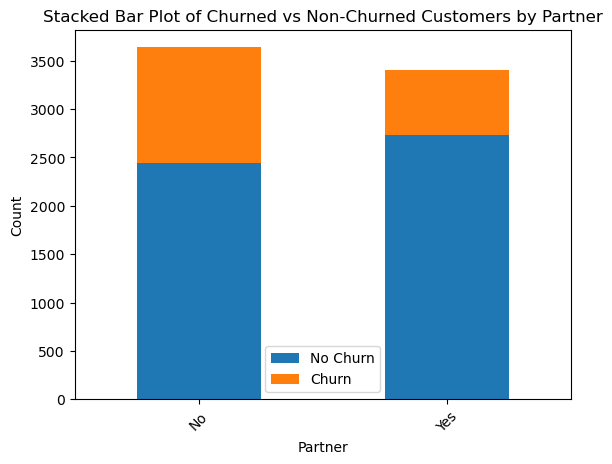

<Figure size 1000x600 with 0 Axes>

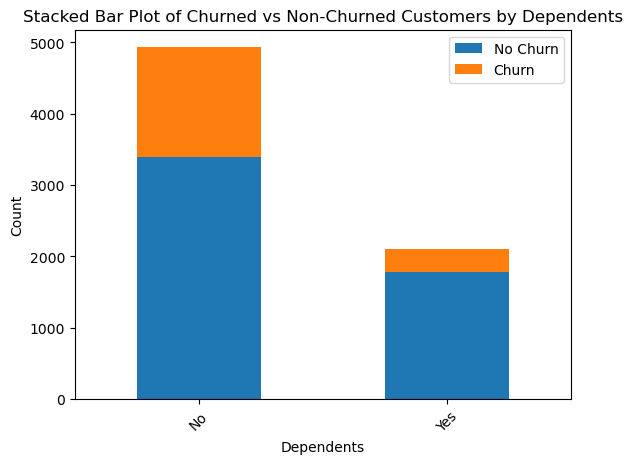

<Figure size 1000x600 with 0 Axes>

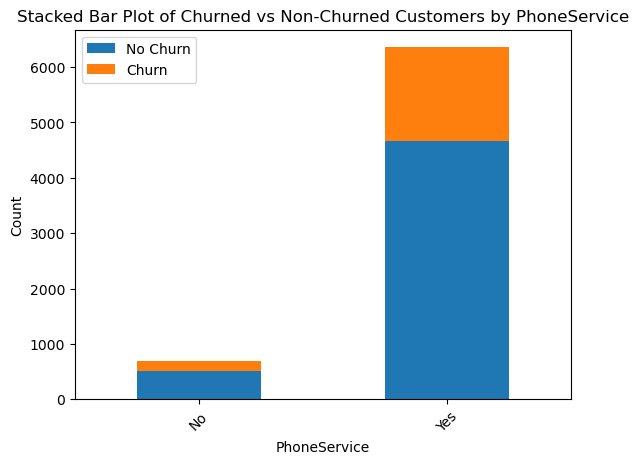

<Figure size 1000x600 with 0 Axes>

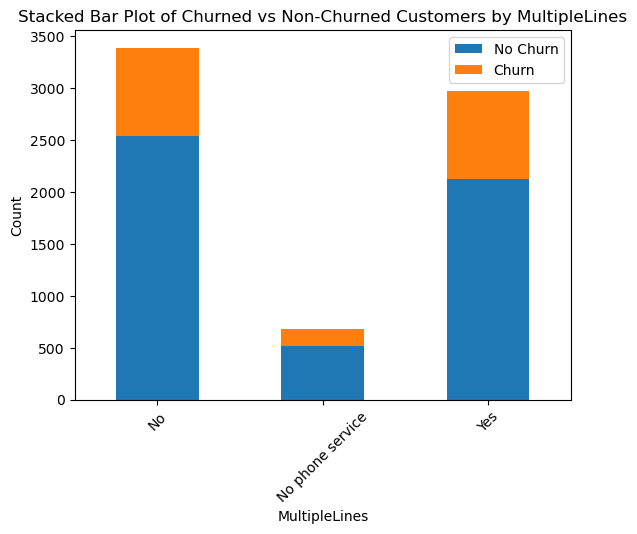

<Figure size 1000x600 with 0 Axes>

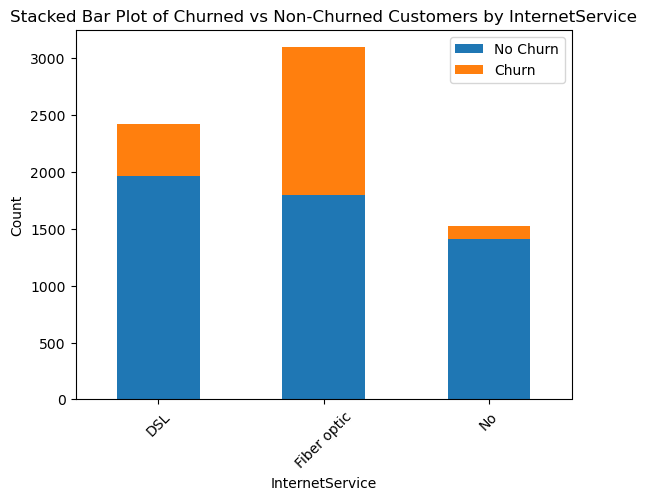

<Figure size 1000x600 with 0 Axes>

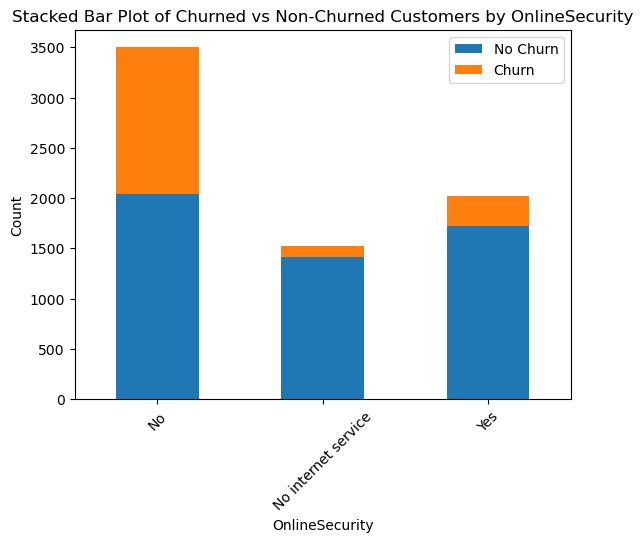

<Figure size 1000x600 with 0 Axes>

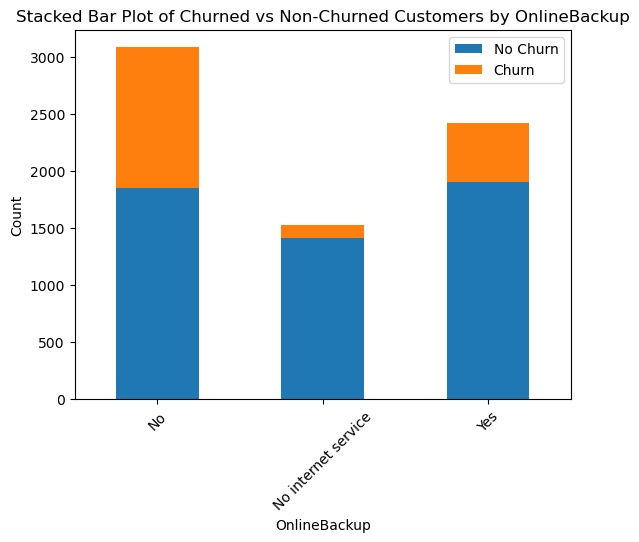

<Figure size 1000x600 with 0 Axes>

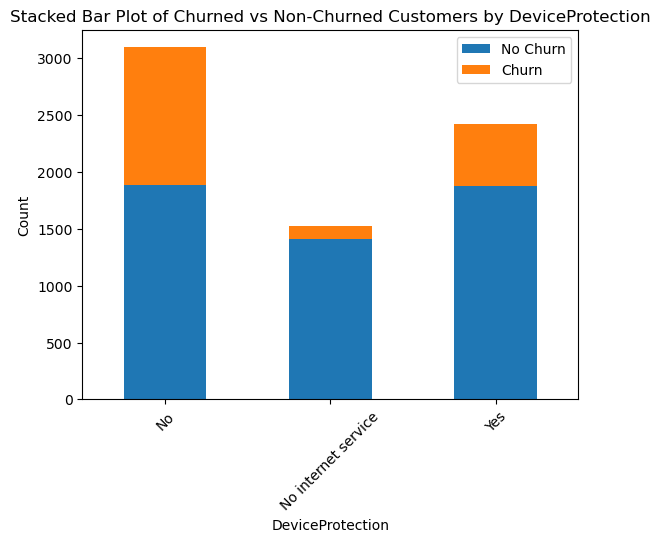

<Figure size 1000x600 with 0 Axes>

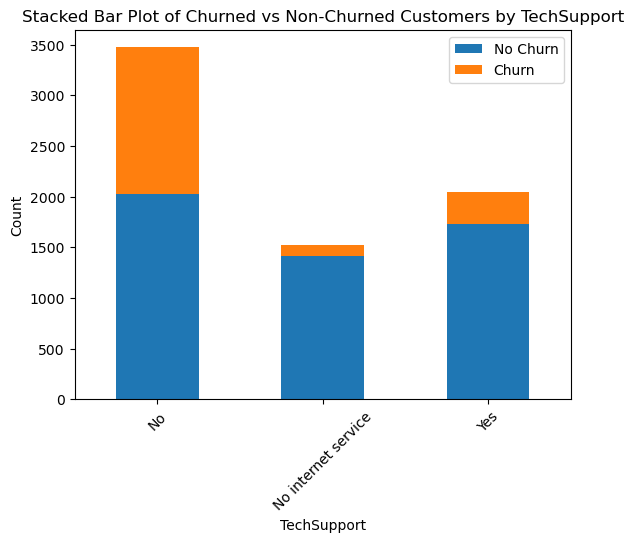

<Figure size 1000x600 with 0 Axes>

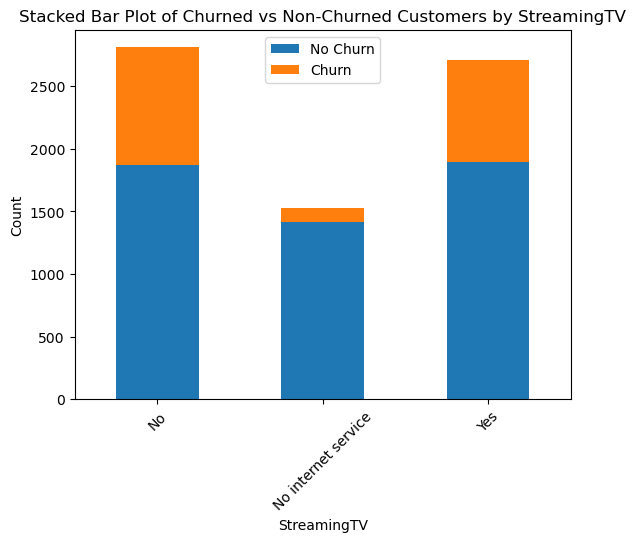

<Figure size 1000x600 with 0 Axes>

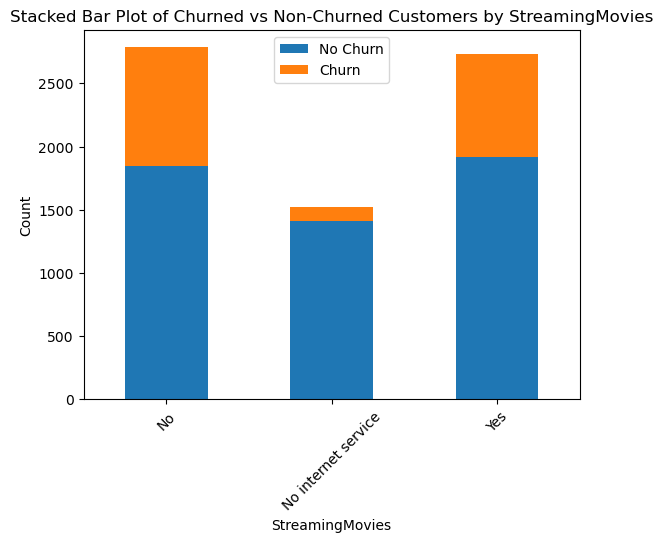

<Figure size 1000x600 with 0 Axes>

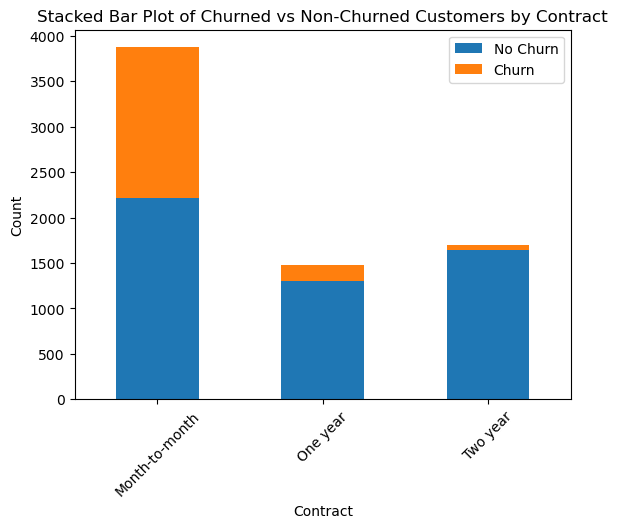

<Figure size 1000x600 with 0 Axes>

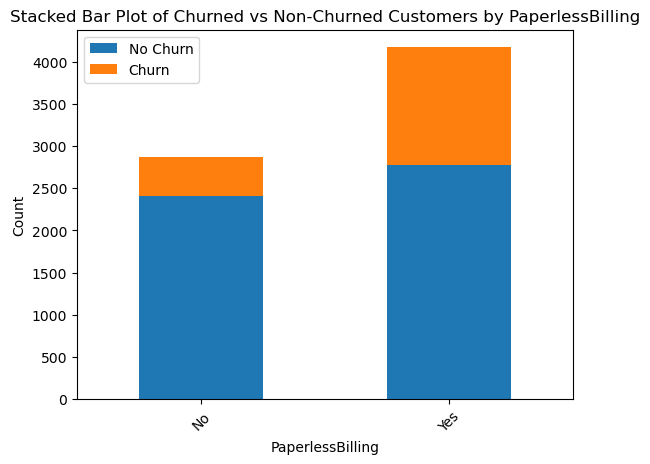

<Figure size 1000x600 with 0 Axes>

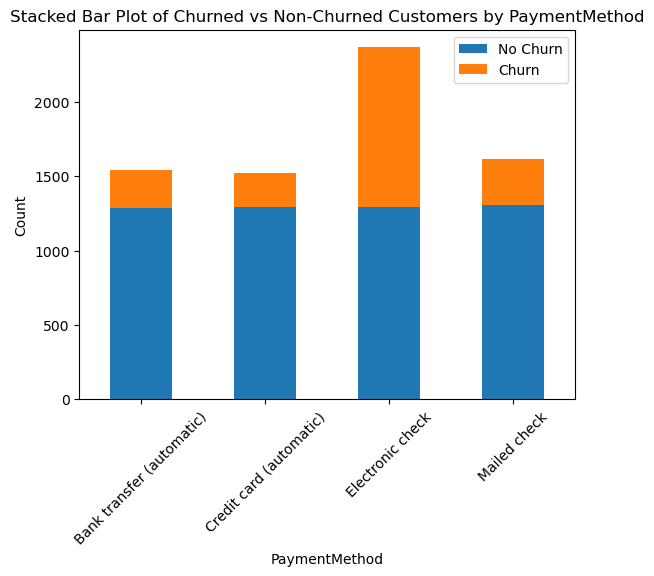

In [17]:
# Visualize the stacked bar plot of churned vs non-churned customers based on categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    churn_counts = df.groupby([feature, 'Churn']).size().unstack()
    churn_counts.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of Churned vs Non-Churned Customers by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['No Churn', 'Churn'])
    plt.show()

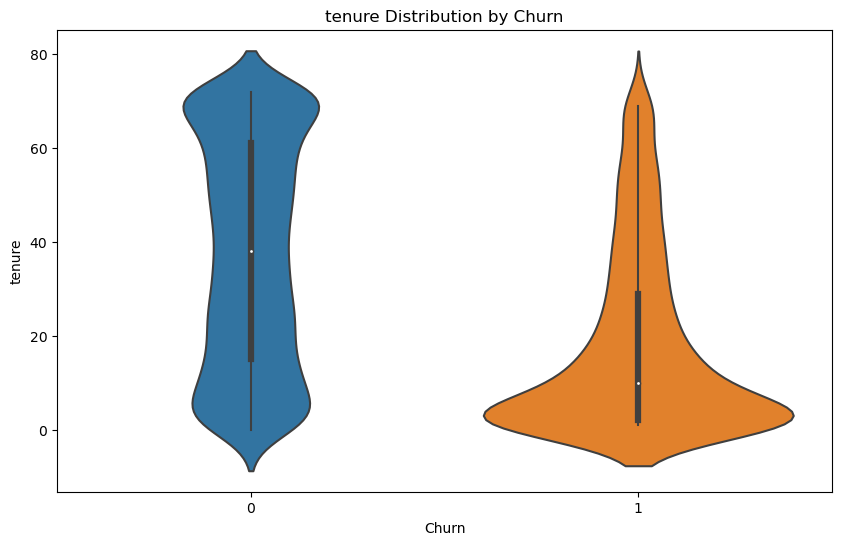

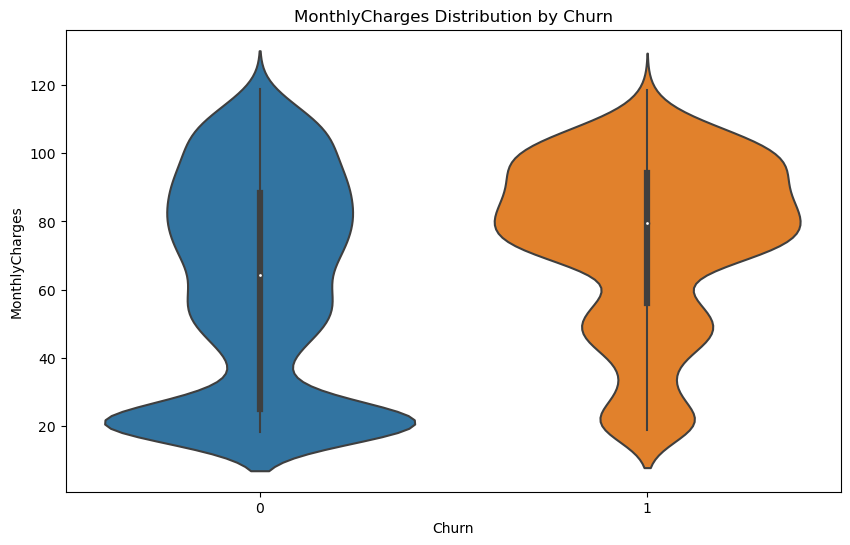

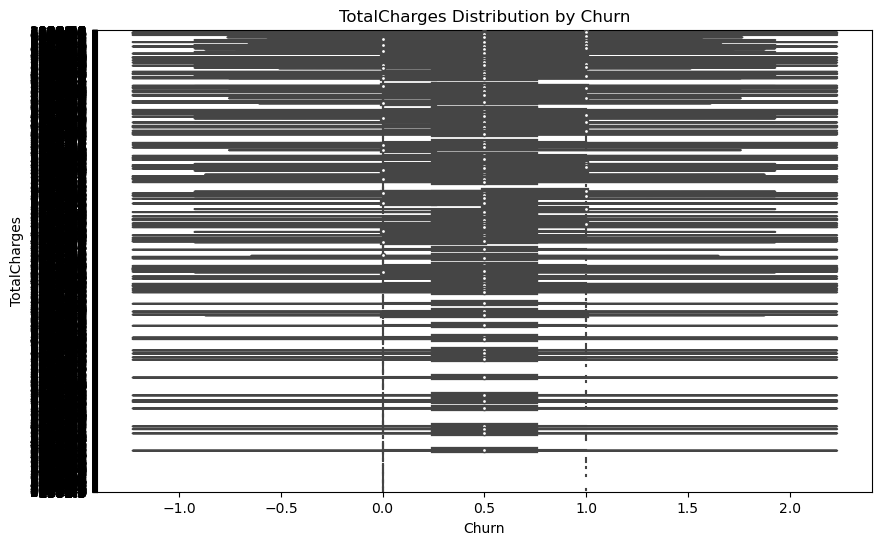

In [18]:
# Visualize the churn distribution based on numerical features using violin plots
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

In [19]:
# Convert 'Churn Rate' values to float
churn_rate['Churn Rate'] = churn_rate['Churn Rate'].astype(float)

# Generate a heatmap of the churn rate across categorical features
plt.figure(figsize=(10, 6))
sns.heatmap(churn_rate, annot=True, cmap='YlGnBu', fmt='.2%', cbar_kws={'format': '%.2f%%'})
plt.title('Churn Rate across Categorical Features')
plt.xlabel('Churn Rate')
plt.ylabel('Features')
plt.show()

NameError: name 'churn_rate' is not defined

In [ ]:
# Visualize the pairwise relationships between select numerical features
selected_num_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

sns.pairplot(df[selected_num_features], hue='Churn', corner=True)
plt.title('Pairwise Relationships between Numerical Features')
plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()